#### Create our first numerai model - will use ensemble of randomforest regressor, support vector regression and conditional inference. Will also use a cross-validation approach along with random search for hyperparameter tuning

In [1]:
#from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
#from rgf.sklearn import RGFRegressor
#from catboost import CatBoostRegressor


3.7.9 (default, Sep 16 2020, 12:18:26) 
[Clang 10.0.1 (clang-1001.0.46.4)]


In [25]:
import sys

import numerapi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingRegressor
from sklearn.decomposition import PCA

In [17]:
public_key='Z3WSDWZNFSLTNXIJPUGWLXUEXNRGENV6'
secret_key='LNA57ECIKXLOO73P2JS3CA56BNMAA6BFVFY2YTAQ7IEBS47HWVDFYM7PRHT5OSD2'
model_id='cf1b66bc-0e73-44dd-95b4-e3021ea3b09a'

In [18]:
num_api = numerapi.NumerAPI(public_key, secret_key,verbosity="info")
num_api.download_current_dataset(dest_path='../data/')


../data/numerai_dataset_252.zip:   0%|          | 0.00/392M [00:00<?, ?B/s]
../data/numerai_dataset_252.zip:   0%|          | 1.02k/392M [00:00<17:41:45, 6.16kB/s]
../data/numerai_dataset_252.zip:   0%|          | 34.8k/392M [00:00<12:33:16, 8.68kB/s]
../data/numerai_dataset_252.zip:   0%|          | 87.0k/392M [00:00<8:51:20, 12.3kB/s] 
../data/numerai_dataset_252.zip:   0%|          | 170k/392M [00:00<6:14:13, 17.5kB/s] 
../data/numerai_dataset_252.zip:   0%|          | 208k/392M [00:00<4:42:10, 23.2kB/s]
../data/numerai_dataset_252.zip:   0%|          | 453k/392M [00:01<3:18:52, 32.8kB/s]
../data/numerai_dataset_252.zip:   0%|          | 513k/392M [00:01<2:25:34, 44.9kB/s]
../data/numerai_dataset_252.zip:   0%|          | 565k/392M [00:01<1:46:53, 61.1kB/s]
../data/numerai_dataset_252.zip:   0%|          | 731k/392M [00:01<1:16:56, 84.8kB/s]
../data/numerai_dataset_252.zip:   0%|          | 836k/392M [00:01<57:08, 114kB/s]   
../data/numerai_dataset_252.zip:   0%|          | 940k/3

../data/numerai_dataset_252.zip:   2%|▏         | 6.37M/392M [00:13<17:13, 374kB/s]
../data/numerai_dataset_252.zip:   2%|▏         | 6.42M/392M [00:13<16:25, 392kB/s]
../data/numerai_dataset_252.zip:   2%|▏         | 6.48M/392M [00:13<16:04, 400kB/s]
../data/numerai_dataset_252.zip:   2%|▏         | 6.52M/392M [00:13<16:17, 395kB/s]
../data/numerai_dataset_252.zip:   2%|▏         | 6.58M/392M [00:14<15:03, 427kB/s]
../data/numerai_dataset_252.zip:   2%|▏         | 6.63M/392M [00:14<14:50, 433kB/s]
../data/numerai_dataset_252.zip:   2%|▏         | 6.68M/392M [00:14<14:50, 433kB/s]
../data/numerai_dataset_252.zip:   2%|▏         | 6.74M/392M [00:14<14:25, 446kB/s]
../data/numerai_dataset_252.zip:   2%|▏         | 6.81M/392M [00:14<13:14, 485kB/s]
../data/numerai_dataset_252.zip:   2%|▏         | 6.86M/392M [00:14<13:48, 465kB/s]
../data/numerai_dataset_252.zip:   2%|▏         | 6.93M/392M [00:14<12:51, 500kB/s]
../data/numerai_dataset_252.zip:   2%|▏         | 7.00M/392M [00:14<14:03, 4

../data/numerai_dataset_252.zip:   4%|▎         | 13.9M/392M [00:27<22:31, 280kB/s]
../data/numerai_dataset_252.zip:   4%|▎         | 13.9M/392M [00:27<22:06, 285kB/s]
../data/numerai_dataset_252.zip:   4%|▎         | 13.9M/392M [00:27<24:37, 256kB/s]
../data/numerai_dataset_252.zip:   4%|▎         | 13.9M/392M [00:28<26:23, 239kB/s]
../data/numerai_dataset_252.zip:   4%|▎         | 14.0M/392M [00:28<25:14, 250kB/s]
../data/numerai_dataset_252.zip:   4%|▎         | 14.0M/392M [00:28<24:15, 260kB/s]
../data/numerai_dataset_252.zip:   4%|▎         | 14.1M/392M [00:28<22:36, 279kB/s]
../data/numerai_dataset_252.zip:   4%|▎         | 14.1M/392M [00:28<21:19, 296kB/s]
../data/numerai_dataset_252.zip:   4%|▎         | 14.2M/392M [00:28<23:18, 270kB/s]
../data/numerai_dataset_252.zip:   4%|▎         | 14.2M/392M [00:29<31:01, 203kB/s]
../data/numerai_dataset_252.zip:   4%|▎         | 14.2M/392M [00:29<25:27, 248kB/s]
../data/numerai_dataset_252.zip:   4%|▎         | 14.3M/392M [00:29<25:24, 2

../data/numerai_dataset_252.zip:   5%|▍         | 18.6M/392M [00:43<20:01, 311kB/s]
../data/numerai_dataset_252.zip:   5%|▍         | 18.6M/392M [00:43<19:43, 316kB/s]
../data/numerai_dataset_252.zip:   5%|▍         | 18.7M/392M [00:43<20:08, 309kB/s]
../data/numerai_dataset_252.zip:   5%|▍         | 18.7M/392M [00:43<20:55, 298kB/s]
../data/numerai_dataset_252.zip:   5%|▍         | 18.8M/392M [00:43<18:23, 339kB/s]
../data/numerai_dataset_252.zip:   5%|▍         | 18.8M/392M [00:43<18:34, 335kB/s]
../data/numerai_dataset_252.zip:   5%|▍         | 18.8M/392M [00:43<19:29, 319kB/s]
../data/numerai_dataset_252.zip:   5%|▍         | 18.9M/392M [00:44<17:36, 353kB/s]
../data/numerai_dataset_252.zip:   5%|▍         | 18.9M/392M [00:44<16:57, 367kB/s]
../data/numerai_dataset_252.zip:   5%|▍         | 19.0M/392M [00:44<17:23, 358kB/s]
../data/numerai_dataset_252.zip:   5%|▍         | 19.0M/392M [00:44<15:58, 390kB/s]
../data/numerai_dataset_252.zip:   5%|▍         | 19.1M/392M [00:44<15:53, 3

../data/numerai_dataset_252.zip:   6%|▌         | 24.4M/392M [00:58<20:32, 299kB/s]
../data/numerai_dataset_252.zip:   6%|▌         | 24.4M/392M [00:58<19:18, 318kB/s]
../data/numerai_dataset_252.zip:   6%|▌         | 24.5M/392M [00:58<20:46, 295kB/s]
../data/numerai_dataset_252.zip:   6%|▌         | 24.5M/392M [00:59<20:26, 300kB/s]
../data/numerai_dataset_252.zip:   6%|▋         | 24.5M/392M [00:59<21:36, 284kB/s]
../data/numerai_dataset_252.zip:   6%|▋         | 24.6M/392M [00:59<22:29, 273kB/s]
../data/numerai_dataset_252.zip:   6%|▋         | 24.6M/392M [00:59<19:29, 314kB/s]
../data/numerai_dataset_252.zip:   6%|▋         | 24.7M/392M [00:59<19:25, 315kB/s]
../data/numerai_dataset_252.zip:   6%|▋         | 24.7M/392M [00:59<20:17, 302kB/s]
../data/numerai_dataset_252.zip:   6%|▋         | 24.8M/392M [00:59<17:56, 342kB/s]
../data/numerai_dataset_252.zip:   6%|▋         | 24.8M/392M [01:00<20:27, 300kB/s]
../data/numerai_dataset_252.zip:   6%|▋         | 24.8M/392M [01:00<20:27, 2

../data/numerai_dataset_252.zip:   8%|▊         | 30.0M/392M [01:13<14:09, 426kB/s]
../data/numerai_dataset_252.zip:   8%|▊         | 30.1M/392M [01:13<12:56, 466kB/s]
../data/numerai_dataset_252.zip:   8%|▊         | 30.1M/392M [01:13<12:58, 465kB/s]
../data/numerai_dataset_252.zip:   8%|▊         | 30.2M/392M [01:13<13:15, 455kB/s]
../data/numerai_dataset_252.zip:   8%|▊         | 30.2M/392M [01:13<13:27, 448kB/s]
../data/numerai_dataset_252.zip:   8%|▊         | 30.3M/392M [01:13<11:54, 507kB/s]
../data/numerai_dataset_252.zip:   8%|▊         | 30.4M/392M [01:13<11:58, 504kB/s]
../data/numerai_dataset_252.zip:   8%|▊         | 30.4M/392M [01:13<12:31, 482kB/s]
../data/numerai_dataset_252.zip:   8%|▊         | 30.5M/392M [01:14<11:08, 541kB/s]
../data/numerai_dataset_252.zip:   8%|▊         | 30.6M/392M [01:14<11:48, 510kB/s]
../data/numerai_dataset_252.zip:   8%|▊         | 30.6M/392M [01:14<11:20, 532kB/s]
../data/numerai_dataset_252.zip:   8%|▊         | 30.7M/392M [01:14<10:09, 5

../data/numerai_dataset_252.zip:   9%|▉         | 35.5M/392M [01:28<17:50, 333kB/s]
../data/numerai_dataset_252.zip:   9%|▉         | 35.5M/392M [01:28<17:36, 338kB/s]
../data/numerai_dataset_252.zip:   9%|▉         | 35.6M/392M [01:29<24:41, 241kB/s]
../data/numerai_dataset_252.zip:   9%|▉         | 35.6M/392M [01:29<20:31, 290kB/s]
../data/numerai_dataset_252.zip:   9%|▉         | 35.7M/392M [01:29<18:42, 318kB/s]
../data/numerai_dataset_252.zip:   9%|▉         | 35.7M/392M [01:29<18:07, 328kB/s]
../data/numerai_dataset_252.zip:   9%|▉         | 35.8M/392M [01:29<18:36, 319kB/s]
../data/numerai_dataset_252.zip:   9%|▉         | 35.8M/392M [01:29<18:49, 316kB/s]
../data/numerai_dataset_252.zip:   9%|▉         | 35.8M/392M [01:29<18:48, 316kB/s]
../data/numerai_dataset_252.zip:   9%|▉         | 35.9M/392M [01:29<18:15, 326kB/s]
../data/numerai_dataset_252.zip:   9%|▉         | 36.0M/392M [01:30<17:19, 343kB/s]
../data/numerai_dataset_252.zip:   9%|▉         | 36.1M/392M [01:30<16:33, 3

../data/numerai_dataset_252.zip:  10%|█         | 40.2M/392M [01:43<21:17, 276kB/s]
../data/numerai_dataset_252.zip:  10%|█         | 40.2M/392M [01:43<20:28, 287kB/s]
../data/numerai_dataset_252.zip:  10%|█         | 40.3M/392M [01:43<20:01, 293kB/s]
../data/numerai_dataset_252.zip:  10%|█         | 40.3M/392M [01:43<18:25, 318kB/s]
../data/numerai_dataset_252.zip:  10%|█         | 40.4M/392M [01:44<17:19, 339kB/s]
../data/numerai_dataset_252.zip:  10%|█         | 40.5M/392M [01:44<16:17, 360kB/s]
../data/numerai_dataset_252.zip:  10%|█         | 40.5M/392M [01:44<14:32, 403kB/s]
../data/numerai_dataset_252.zip:  10%|█         | 40.6M/392M [01:44<12:57, 452kB/s]
../data/numerai_dataset_252.zip:  10%|█         | 40.7M/392M [01:44<14:04, 416kB/s]
../data/numerai_dataset_252.zip:  10%|█         | 40.7M/392M [01:44<13:53, 422kB/s]
../data/numerai_dataset_252.zip:  10%|█         | 40.8M/392M [01:44<12:29, 469kB/s]
../data/numerai_dataset_252.zip:  10%|█         | 40.9M/392M [01:45<11:40, 5

../data/numerai_dataset_252.zip:  12%|█▏        | 46.1M/392M [01:57<21:11, 272kB/s]
../data/numerai_dataset_252.zip:  12%|█▏        | 46.2M/392M [01:57<20:47, 277kB/s]
../data/numerai_dataset_252.zip:  12%|█▏        | 46.3M/392M [01:57<20:16, 285kB/s]
../data/numerai_dataset_252.zip:  12%|█▏        | 46.3M/392M [01:58<19:56, 289kB/s]
../data/numerai_dataset_252.zip:  12%|█▏        | 46.4M/392M [01:58<17:32, 329kB/s]
../data/numerai_dataset_252.zip:  12%|█▏        | 46.4M/392M [01:58<17:53, 322kB/s]
../data/numerai_dataset_252.zip:  12%|█▏        | 46.5M/392M [01:58<18:05, 319kB/s]
../data/numerai_dataset_252.zip:  12%|█▏        | 46.5M/392M [01:58<18:11, 317kB/s]
../data/numerai_dataset_252.zip:  12%|█▏        | 46.6M/392M [01:58<17:11, 335kB/s]
../data/numerai_dataset_252.zip:  12%|█▏        | 46.6M/392M [01:59<17:52, 322kB/s]
../data/numerai_dataset_252.zip:  12%|█▏        | 46.7M/392M [01:59<17:59, 320kB/s]
../data/numerai_dataset_252.zip:  12%|█▏        | 46.7M/392M [01:59<16:02, 3

../data/numerai_dataset_252.zip:  14%|█▍        | 54.1M/392M [02:11<20:37, 273kB/s]
../data/numerai_dataset_252.zip:  14%|█▍        | 54.1M/392M [02:11<20:02, 281kB/s]
../data/numerai_dataset_252.zip:  14%|█▍        | 54.2M/392M [02:11<19:48, 285kB/s]
../data/numerai_dataset_252.zip:  14%|█▍        | 54.2M/392M [02:12<19:26, 290kB/s]
../data/numerai_dataset_252.zip:  14%|█▍        | 54.3M/392M [02:12<18:59, 297kB/s]
../data/numerai_dataset_252.zip:  14%|█▍        | 54.3M/392M [02:12<19:00, 297kB/s]
../data/numerai_dataset_252.zip:  14%|█▍        | 54.4M/392M [02:12<18:46, 300kB/s]
../data/numerai_dataset_252.zip:  14%|█▍        | 54.5M/392M [02:12<18:14, 309kB/s]
../data/numerai_dataset_252.zip:  14%|█▍        | 54.5M/392M [02:12<18:17, 308kB/s]
../data/numerai_dataset_252.zip:  14%|█▍        | 54.6M/392M [02:13<17:32, 321kB/s]
../data/numerai_dataset_252.zip:  14%|█▍        | 54.6M/392M [02:13<18:41, 301kB/s]
../data/numerai_dataset_252.zip:  14%|█▍        | 54.7M/392M [02:13<17:41, 3

../data/numerai_dataset_252.zip:  15%|█▍        | 58.6M/392M [02:27<28:32, 195kB/s]
../data/numerai_dataset_252.zip:  15%|█▍        | 58.6M/392M [02:27<26:09, 213kB/s]
../data/numerai_dataset_252.zip:  15%|█▍        | 58.7M/392M [02:28<26:16, 212kB/s]
../data/numerai_dataset_252.zip:  15%|█▍        | 58.7M/392M [02:28<24:08, 230kB/s]
../data/numerai_dataset_252.zip:  15%|█▍        | 58.8M/392M [02:28<24:28, 227kB/s]
../data/numerai_dataset_252.zip:  15%|█▍        | 58.8M/392M [02:28<22:54, 243kB/s]
../data/numerai_dataset_252.zip:  15%|█▌        | 58.9M/392M [02:28<21:04, 264kB/s]
../data/numerai_dataset_252.zip:  15%|█▌        | 58.9M/392M [02:28<17:57, 310kB/s]
../data/numerai_dataset_252.zip:  15%|█▌        | 59.0M/392M [02:29<19:29, 285kB/s]
../data/numerai_dataset_252.zip:  15%|█▌        | 59.0M/392M [02:29<17:11, 323kB/s]
../data/numerai_dataset_252.zip:  15%|█▌        | 59.1M/392M [02:29<16:03, 346kB/s]
../data/numerai_dataset_252.zip:  15%|█▌        | 59.2M/392M [02:29<15:04, 3

../data/numerai_dataset_252.zip:  18%|█▊        | 69.0M/392M [02:41<26:26, 204kB/s]
../data/numerai_dataset_252.zip:  18%|█▊        | 69.0M/392M [02:42<26:11, 206kB/s]
../data/numerai_dataset_252.zip:  18%|█▊        | 69.1M/392M [02:42<24:44, 218kB/s]
../data/numerai_dataset_252.zip:  18%|█▊        | 69.1M/392M [02:42<22:48, 236kB/s]
../data/numerai_dataset_252.zip:  18%|█▊        | 69.1M/392M [02:42<25:09, 214kB/s]
../data/numerai_dataset_252.zip:  18%|█▊        | 69.2M/392M [02:42<24:12, 222kB/s]
../data/numerai_dataset_252.zip:  18%|█▊        | 69.2M/392M [02:42<23:14, 232kB/s]
../data/numerai_dataset_252.zip:  18%|█▊        | 69.3M/392M [02:43<22:42, 237kB/s]
../data/numerai_dataset_252.zip:  18%|█▊        | 69.3M/392M [02:43<22:08, 243kB/s]
../data/numerai_dataset_252.zip:  18%|█▊        | 69.4M/392M [02:43<20:05, 268kB/s]
../data/numerai_dataset_252.zip:  18%|█▊        | 69.4M/392M [02:43<22:56, 235kB/s]
../data/numerai_dataset_252.zip:  18%|█▊        | 69.5M/392M [02:43<21:42, 2

../data/numerai_dataset_252.zip:  19%|█▉        | 73.8M/392M [02:55<19:22, 274kB/s]
../data/numerai_dataset_252.zip:  19%|█▉        | 73.8M/392M [02:55<18:53, 281kB/s]
../data/numerai_dataset_252.zip:  19%|█▉        | 73.9M/392M [02:55<18:29, 287kB/s]
../data/numerai_dataset_252.zip:  19%|█▉        | 73.9M/392M [02:56<18:47, 282kB/s]
../data/numerai_dataset_252.zip:  19%|█▉        | 74.0M/392M [02:56<18:26, 288kB/s]
../data/numerai_dataset_252.zip:  19%|█▉        | 74.1M/392M [02:56<18:15, 291kB/s]
../data/numerai_dataset_252.zip:  19%|█▉        | 74.1M/392M [02:56<18:07, 293kB/s]
../data/numerai_dataset_252.zip:  19%|█▉        | 74.2M/392M [02:56<17:58, 295kB/s]
../data/numerai_dataset_252.zip:  19%|█▉        | 74.2M/392M [02:56<17:51, 297kB/s]
../data/numerai_dataset_252.zip:  19%|█▉        | 74.3M/392M [02:57<17:42, 299kB/s]
../data/numerai_dataset_252.zip:  19%|█▉        | 74.3M/392M [02:57<17:41, 300kB/s]
../data/numerai_dataset_252.zip:  19%|█▉        | 74.4M/392M [02:57<17:30, 3

../data/numerai_dataset_252.zip:  20%|██        | 79.4M/392M [03:10<22:00, 237kB/s]
../data/numerai_dataset_252.zip:  20%|██        | 79.4M/392M [03:10<20:07, 259kB/s]
../data/numerai_dataset_252.zip:  20%|██        | 79.4M/392M [03:10<22:13, 235kB/s]
../data/numerai_dataset_252.zip:  20%|██        | 79.5M/392M [03:10<25:23, 205kB/s]
../data/numerai_dataset_252.zip:  20%|██        | 79.5M/392M [03:10<24:09, 216kB/s]
../data/numerai_dataset_252.zip:  20%|██        | 79.5M/392M [03:10<22:10, 235kB/s]
../data/numerai_dataset_252.zip:  20%|██        | 79.5M/392M [03:10<21:48, 239kB/s]
../data/numerai_dataset_252.zip:  20%|██        | 79.6M/392M [03:10<24:10, 216kB/s]
../data/numerai_dataset_252.zip:  20%|██        | 79.6M/392M [03:11<20:11, 258kB/s]
../data/numerai_dataset_252.zip:  20%|██        | 79.7M/392M [03:11<22:02, 237kB/s]
../data/numerai_dataset_252.zip:  20%|██        | 79.7M/392M [03:11<23:38, 220kB/s]
../data/numerai_dataset_252.zip:  20%|██        | 79.7M/392M [03:11<22:56, 2

../data/numerai_dataset_252.zip:  23%|██▎       | 88.4M/392M [03:21<04:17, 1.18MB/s]
../data/numerai_dataset_252.zip:  23%|██▎       | 88.6M/392M [03:21<03:59, 1.27MB/s]
../data/numerai_dataset_252.zip:  23%|██▎       | 88.7M/392M [03:21<04:13, 1.20MB/s]
../data/numerai_dataset_252.zip:  23%|██▎       | 88.9M/392M [03:21<04:08, 1.22MB/s]
../data/numerai_dataset_252.zip:  23%|██▎       | 89.0M/392M [03:22<04:01, 1.26MB/s]
../data/numerai_dataset_252.zip:  23%|██▎       | 89.1M/392M [03:22<04:03, 1.24MB/s]
../data/numerai_dataset_252.zip:  23%|██▎       | 89.3M/392M [03:22<03:55, 1.28MB/s]
../data/numerai_dataset_252.zip:  23%|██▎       | 89.4M/392M [03:22<03:56, 1.28MB/s]
../data/numerai_dataset_252.zip:  23%|██▎       | 89.5M/392M [03:22<06:33, 770kB/s] 
../data/numerai_dataset_252.zip:  23%|██▎       | 89.6M/392M [03:23<09:15, 545kB/s]
../data/numerai_dataset_252.zip:  23%|██▎       | 89.7M/392M [03:23<14:38, 344kB/s]
../data/numerai_dataset_252.zip:  23%|██▎       | 89.9M/392M [03:23

../data/numerai_dataset_252.zip:  25%|██▍       | 96.7M/392M [03:33<04:45, 1.04MB/s]
../data/numerai_dataset_252.zip:  25%|██▍       | 96.9M/392M [03:33<04:18, 1.14MB/s]
../data/numerai_dataset_252.zip:  25%|██▍       | 97.0M/392M [03:33<06:07, 804kB/s] 
../data/numerai_dataset_252.zip:  25%|██▍       | 97.2M/392M [03:34<04:54, 1.00MB/s]
../data/numerai_dataset_252.zip:  25%|██▍       | 97.4M/392M [03:34<05:05, 966kB/s] 
../data/numerai_dataset_252.zip:  25%|██▍       | 97.5M/392M [03:34<05:17, 928kB/s]
../data/numerai_dataset_252.zip:  25%|██▍       | 97.6M/392M [03:34<04:52, 1.01MB/s]
../data/numerai_dataset_252.zip:  25%|██▍       | 97.7M/392M [03:34<04:44, 1.04MB/s]
../data/numerai_dataset_252.zip:  25%|██▍       | 97.9M/392M [03:34<04:59, 983kB/s] 
../data/numerai_dataset_252.zip:  25%|██▍       | 98.0M/392M [03:34<04:34, 1.07MB/s]
../data/numerai_dataset_252.zip:  25%|██▌       | 98.1M/392M [03:34<04:44, 1.03MB/s]
../data/numerai_dataset_252.zip:  25%|██▌       | 98.2M/392M [03:3

../data/numerai_dataset_252.zip:  27%|██▋       | 106M/392M [03:47<08:09, 586kB/s]
../data/numerai_dataset_252.zip:  27%|██▋       | 106M/392M [03:47<08:26, 566kB/s]
../data/numerai_dataset_252.zip:  27%|██▋       | 106M/392M [03:47<08:13, 581kB/s]
../data/numerai_dataset_252.zip:  27%|██▋       | 106M/392M [03:47<07:24, 644kB/s]
../data/numerai_dataset_252.zip:  27%|██▋       | 106M/392M [03:47<07:37, 626kB/s]
../data/numerai_dataset_252.zip:  27%|██▋       | 106M/392M [03:47<07:12, 662kB/s]
../data/numerai_dataset_252.zip:  27%|██▋       | 106M/392M [03:47<06:45, 707kB/s]
../data/numerai_dataset_252.zip:  27%|██▋       | 106M/392M [03:47<07:11, 663kB/s]
../data/numerai_dataset_252.zip:  27%|██▋       | 106M/392M [03:48<06:59, 681kB/s]
../data/numerai_dataset_252.zip:  27%|██▋       | 106M/392M [03:48<06:08, 777kB/s]
../data/numerai_dataset_252.zip:  27%|██▋       | 106M/392M [03:48<06:33, 726kB/s]
../data/numerai_dataset_252.zip:  27%|██▋       | 106M/392M [03:48<06:15, 762kB/s]
../d

../data/numerai_dataset_252.zip:  29%|██▉       | 115M/392M [04:01<11:37, 398kB/s]
../data/numerai_dataset_252.zip:  29%|██▉       | 115M/392M [04:01<11:39, 397kB/s]
../data/numerai_dataset_252.zip:  29%|██▉       | 115M/392M [04:01<11:35, 399kB/s]
../data/numerai_dataset_252.zip:  29%|██▉       | 115M/392M [04:01<11:36, 399kB/s]
../data/numerai_dataset_252.zip:  29%|██▉       | 115M/392M [04:01<11:33, 400kB/s]
../data/numerai_dataset_252.zip:  29%|██▉       | 115M/392M [04:01<11:32, 401kB/s]
../data/numerai_dataset_252.zip:  29%|██▉       | 115M/392M [04:02<11:32, 401kB/s]
../data/numerai_dataset_252.zip:  29%|██▉       | 115M/392M [04:02<11:32, 401kB/s]
../data/numerai_dataset_252.zip:  29%|██▉       | 115M/392M [04:02<11:37, 397kB/s]
../data/numerai_dataset_252.zip:  29%|██▉       | 115M/392M [04:02<11:08, 415kB/s]
../data/numerai_dataset_252.zip:  29%|██▉       | 115M/392M [04:02<11:12, 412kB/s]
../data/numerai_dataset_252.zip:  29%|██▉       | 115M/392M [04:02<10:35, 436kB/s]
../d

../data/numerai_dataset_252.zip:  32%|███▏      | 125M/392M [04:13<06:47, 658kB/s]
../data/numerai_dataset_252.zip:  32%|███▏      | 125M/392M [04:13<07:07, 627kB/s]
../data/numerai_dataset_252.zip:  32%|███▏      | 125M/392M [04:13<07:19, 609kB/s]
../data/numerai_dataset_252.zip:  32%|███▏      | 125M/392M [04:13<06:39, 671kB/s]
../data/numerai_dataset_252.zip:  32%|███▏      | 125M/392M [04:13<07:05, 629kB/s]
../data/numerai_dataset_252.zip:  32%|███▏      | 125M/392M [04:13<07:08, 624kB/s]
../data/numerai_dataset_252.zip:  32%|███▏      | 125M/392M [04:14<06:27, 691kB/s]
../data/numerai_dataset_252.zip:  32%|███▏      | 125M/392M [04:14<06:52, 649kB/s]
../data/numerai_dataset_252.zip:  32%|███▏      | 125M/392M [04:14<06:47, 656kB/s]
../data/numerai_dataset_252.zip:  32%|███▏      | 125M/392M [04:14<06:19, 703kB/s]
../data/numerai_dataset_252.zip:  32%|███▏      | 125M/392M [04:15<17:20, 257kB/s]
../data/numerai_dataset_252.zip:  32%|███▏      | 126M/392M [04:15<12:51, 346kB/s]
../d

../data/numerai_dataset_252.zip:  34%|███▎      | 132M/392M [04:26<05:06, 850kB/s] 
../data/numerai_dataset_252.zip:  34%|███▎      | 132M/392M [04:26<04:13, 1.02MB/s]
../data/numerai_dataset_252.zip:  34%|███▍      | 132M/392M [04:27<03:54, 1.11MB/s]
../data/numerai_dataset_252.zip:  34%|███▍      | 133M/392M [04:27<04:17, 1.01MB/s]
../data/numerai_dataset_252.zip:  34%|███▍      | 133M/392M [04:27<04:36, 939kB/s] 
../data/numerai_dataset_252.zip:  34%|███▍      | 133M/392M [04:27<05:00, 863kB/s]
../data/numerai_dataset_252.zip:  34%|███▍      | 133M/392M [04:27<06:34, 658kB/s]
../data/numerai_dataset_252.zip:  34%|███▍      | 133M/392M [04:27<05:13, 826kB/s]
../data/numerai_dataset_252.zip:  34%|███▍      | 133M/392M [04:28<05:30, 783kB/s]
../data/numerai_dataset_252.zip:  34%|███▍      | 133M/392M [04:28<05:51, 737kB/s]
../data/numerai_dataset_252.zip:  34%|███▍      | 133M/392M [04:28<08:11, 527kB/s]
../data/numerai_dataset_252.zip:  34%|███▍      | 134M/392M [04:28<08:11, 527kB/s]

../data/numerai_dataset_252.zip:  35%|███▌      | 139M/392M [04:40<06:24, 658kB/s]
../data/numerai_dataset_252.zip:  35%|███▌      | 139M/392M [04:40<06:32, 645kB/s]
../data/numerai_dataset_252.zip:  36%|███▌      | 139M/392M [04:40<06:57, 606kB/s]
../data/numerai_dataset_252.zip:  36%|███▌      | 139M/392M [04:40<06:11, 680kB/s]
../data/numerai_dataset_252.zip:  36%|███▌      | 139M/392M [04:41<06:21, 663kB/s]
../data/numerai_dataset_252.zip:  36%|███▌      | 140M/392M [04:41<07:11, 586kB/s]
../data/numerai_dataset_252.zip:  36%|███▌      | 140M/392M [04:41<07:04, 595kB/s]
../data/numerai_dataset_252.zip:  36%|███▌      | 140M/392M [04:41<06:50, 615kB/s]
../data/numerai_dataset_252.zip:  36%|███▌      | 140M/392M [04:41<06:47, 619kB/s]
../data/numerai_dataset_252.zip:  36%|███▌      | 140M/392M [04:41<06:43, 625kB/s]
../data/numerai_dataset_252.zip:  36%|███▌      | 140M/392M [04:42<09:50, 427kB/s]
../data/numerai_dataset_252.zip:  36%|███▌      | 140M/392M [04:42<09:13, 456kB/s]
../d

../data/numerai_dataset_252.zip:  37%|███▋      | 147M/392M [04:54<03:31, 1.16MB/s]
../data/numerai_dataset_252.zip:  37%|███▋      | 147M/392M [04:54<03:32, 1.15MB/s]
../data/numerai_dataset_252.zip:  37%|███▋      | 147M/392M [04:54<03:32, 1.16MB/s]
../data/numerai_dataset_252.zip:  38%|███▊      | 147M/392M [04:54<03:22, 1.21MB/s]
../data/numerai_dataset_252.zip:  38%|███▊      | 147M/392M [04:54<03:31, 1.16MB/s]
../data/numerai_dataset_252.zip:  38%|███▊      | 147M/392M [04:55<03:27, 1.18MB/s]
../data/numerai_dataset_252.zip:  38%|███▊      | 148M/392M [04:55<05:07, 796kB/s] 
../data/numerai_dataset_252.zip:  38%|███▊      | 148M/392M [04:55<03:59, 1.02MB/s]
../data/numerai_dataset_252.zip:  38%|███▊      | 148M/392M [04:55<04:12, 968kB/s] 
../data/numerai_dataset_252.zip:  38%|███▊      | 148M/392M [04:55<03:56, 1.03MB/s]
../data/numerai_dataset_252.zip:  38%|███▊      | 148M/392M [04:55<04:08, 983kB/s] 
../data/numerai_dataset_252.zip:  38%|███▊      | 148M/392M [04:55<04:20, 93

../data/numerai_dataset_252.zip:  39%|███▉      | 155M/392M [05:07<04:30, 880kB/s]
../data/numerai_dataset_252.zip:  39%|███▉      | 155M/392M [05:07<04:38, 852kB/s]
../data/numerai_dataset_252.zip:  39%|███▉      | 155M/392M [05:07<04:33, 867kB/s]
../data/numerai_dataset_252.zip:  40%|███▉      | 155M/392M [05:07<04:11, 945kB/s]
../data/numerai_dataset_252.zip:  40%|███▉      | 155M/392M [05:07<04:06, 962kB/s]
../data/numerai_dataset_252.zip:  40%|███▉      | 155M/392M [05:07<06:31, 605kB/s]
../data/numerai_dataset_252.zip:  40%|███▉      | 156M/392M [05:08<05:03, 781kB/s]
../data/numerai_dataset_252.zip:  40%|███▉      | 156M/392M [05:08<04:54, 803kB/s]
../data/numerai_dataset_252.zip:  40%|███▉      | 156M/392M [05:08<04:38, 850kB/s]
../data/numerai_dataset_252.zip:  40%|███▉      | 156M/392M [05:08<04:47, 821kB/s]
../data/numerai_dataset_252.zip:  40%|███▉      | 156M/392M [05:08<04:36, 856kB/s]
../data/numerai_dataset_252.zip:  40%|███▉      | 156M/392M [05:08<06:04, 648kB/s]
../d

../data/numerai_dataset_252.zip:  41%|████▏     | 163M/392M [05:19<09:07, 420kB/s]
../data/numerai_dataset_252.zip:  41%|████▏     | 163M/392M [05:20<09:03, 422kB/s]
../data/numerai_dataset_252.zip:  42%|████▏     | 163M/392M [05:20<08:41, 440kB/s]
../data/numerai_dataset_252.zip:  42%|████▏     | 163M/392M [05:20<07:48, 490kB/s]
../data/numerai_dataset_252.zip:  42%|████▏     | 163M/392M [05:20<08:31, 448kB/s]
../data/numerai_dataset_252.zip:  42%|████▏     | 163M/392M [05:20<08:21, 457kB/s]
../data/numerai_dataset_252.zip:  42%|████▏     | 163M/392M [05:20<07:36, 502kB/s]
../data/numerai_dataset_252.zip:  42%|████▏     | 163M/392M [05:20<08:37, 442kB/s]
../data/numerai_dataset_252.zip:  42%|████▏     | 163M/392M [05:20<08:22, 456kB/s]
../data/numerai_dataset_252.zip:  42%|████▏     | 163M/392M [05:21<08:15, 462kB/s]
../data/numerai_dataset_252.zip:  42%|████▏     | 163M/392M [05:21<08:21, 457kB/s]
../data/numerai_dataset_252.zip:  42%|████▏     | 163M/392M [05:21<08:09, 468kB/s]
../d

../data/numerai_dataset_252.zip:  43%|████▎     | 167M/392M [05:35<09:21, 400kB/s]
../data/numerai_dataset_252.zip:  43%|████▎     | 167M/392M [05:35<09:17, 404kB/s]
../data/numerai_dataset_252.zip:  43%|████▎     | 167M/392M [05:35<09:25, 397kB/s]
../data/numerai_dataset_252.zip:  43%|████▎     | 168M/392M [05:35<08:14, 455kB/s]
../data/numerai_dataset_252.zip:  43%|████▎     | 168M/392M [05:35<07:27, 502kB/s]
../data/numerai_dataset_252.zip:  43%|████▎     | 168M/392M [05:35<08:18, 450kB/s]
../data/numerai_dataset_252.zip:  43%|████▎     | 168M/392M [05:35<08:29, 441kB/s]
../data/numerai_dataset_252.zip:  43%|████▎     | 168M/392M [05:36<09:18, 402kB/s]
../data/numerai_dataset_252.zip:  43%|████▎     | 168M/392M [05:36<07:53, 474kB/s]
../data/numerai_dataset_252.zip:  43%|████▎     | 168M/392M [05:36<07:35, 492kB/s]
../data/numerai_dataset_252.zip:  43%|████▎     | 168M/392M [05:36<09:23, 398kB/s]
../data/numerai_dataset_252.zip:  43%|████▎     | 168M/392M [05:36<08:08, 459kB/s]
../d

../data/numerai_dataset_252.zip:  44%|████▎     | 171M/392M [05:52<17:49, 207kB/s]
../data/numerai_dataset_252.zip:  44%|████▎     | 171M/392M [05:52<17:43, 208kB/s]
../data/numerai_dataset_252.zip:  44%|████▎     | 171M/392M [05:52<17:19, 213kB/s]
../data/numerai_dataset_252.zip:  44%|████▎     | 171M/392M [05:52<15:30, 238kB/s]
../data/numerai_dataset_252.zip:  44%|████▎     | 171M/392M [05:52<15:48, 233kB/s]
../data/numerai_dataset_252.zip:  44%|████▎     | 171M/392M [05:52<21:27, 172kB/s]
../data/numerai_dataset_252.zip:  44%|████▎     | 171M/392M [05:52<18:19, 201kB/s]
../data/numerai_dataset_252.zip:  44%|████▎     | 171M/392M [05:53<18:39, 198kB/s]
../data/numerai_dataset_252.zip:  44%|████▎     | 171M/392M [05:53<18:33, 199kB/s]
../data/numerai_dataset_252.zip:  44%|████▎     | 171M/392M [05:53<16:52, 218kB/s]
../data/numerai_dataset_252.zip:  44%|████▎     | 171M/392M [05:53<17:10, 215kB/s]
../data/numerai_dataset_252.zip:  44%|████▎     | 171M/392M [05:53<15:39, 235kB/s]
../d

../data/numerai_dataset_252.zip:  45%|████▍     | 175M/392M [06:06<04:15, 850kB/s]
../data/numerai_dataset_252.zip:  45%|████▍     | 175M/392M [06:07<03:44, 965kB/s]
../data/numerai_dataset_252.zip:  45%|████▍     | 175M/392M [06:07<03:41, 982kB/s]
../data/numerai_dataset_252.zip:  45%|████▍     | 176M/392M [06:07<03:38, 991kB/s]
../data/numerai_dataset_252.zip:  45%|████▍     | 176M/392M [06:07<03:10, 1.14MB/s]
../data/numerai_dataset_252.zip:  45%|████▍     | 176M/392M [06:07<03:08, 1.15MB/s]
../data/numerai_dataset_252.zip:  45%|████▍     | 176M/392M [06:07<03:04, 1.17MB/s]
../data/numerai_dataset_252.zip:  45%|████▍     | 176M/392M [06:07<02:42, 1.33MB/s]
../data/numerai_dataset_252.zip:  45%|████▍     | 176M/392M [06:07<02:50, 1.27MB/s]
../data/numerai_dataset_252.zip:  45%|████▍     | 177M/392M [06:07<02:41, 1.34MB/s]
../data/numerai_dataset_252.zip:  45%|████▌     | 177M/392M [06:08<03:55, 917kB/s] 
../data/numerai_dataset_252.zip:  45%|████▌     | 177M/392M [06:08<03:07, 1.15MB

../data/numerai_dataset_252.zip:  47%|████▋     | 185M/392M [06:21<05:16, 657kB/s]
../data/numerai_dataset_252.zip:  47%|████▋     | 185M/392M [06:22<04:58, 695kB/s]
../data/numerai_dataset_252.zip:  47%|████▋     | 185M/392M [06:22<04:54, 705kB/s]
../data/numerai_dataset_252.zip:  47%|████▋     | 185M/392M [06:22<04:37, 748kB/s]
../data/numerai_dataset_252.zip:  47%|████▋     | 185M/392M [06:22<04:19, 798kB/s]
../data/numerai_dataset_252.zip:  47%|████▋     | 185M/392M [06:22<06:02, 571kB/s]
../data/numerai_dataset_252.zip:  47%|████▋     | 186M/392M [06:22<04:54, 701kB/s]
../data/numerai_dataset_252.zip:  47%|████▋     | 186M/392M [06:23<04:51, 709kB/s]
../data/numerai_dataset_252.zip:  47%|████▋     | 186M/392M [06:23<04:29, 766kB/s]
../data/numerai_dataset_252.zip:  47%|████▋     | 186M/392M [06:23<04:11, 822kB/s]
../data/numerai_dataset_252.zip:  47%|████▋     | 186M/392M [06:23<04:41, 733kB/s]
../data/numerai_dataset_252.zip:  47%|████▋     | 186M/392M [06:23<04:50, 709kB/s]
../d

../data/numerai_dataset_252.zip:  49%|████▉     | 192M/392M [06:36<04:13, 790kB/s]
../data/numerai_dataset_252.zip:  49%|████▉     | 192M/392M [06:36<04:10, 800kB/s]
../data/numerai_dataset_252.zip:  49%|████▉     | 192M/392M [06:36<03:39, 911kB/s]
../data/numerai_dataset_252.zip:  49%|████▉     | 193M/392M [06:37<03:49, 870kB/s]
../data/numerai_dataset_252.zip:  49%|████▉     | 193M/392M [06:37<03:45, 886kB/s]
../data/numerai_dataset_252.zip:  49%|████▉     | 193M/392M [06:37<03:16, 1.01MB/s]
../data/numerai_dataset_252.zip:  49%|████▉     | 193M/392M [06:37<03:26, 968kB/s] 
../data/numerai_dataset_252.zip:  49%|████▉     | 193M/392M [06:37<03:09, 1.05MB/s]
../data/numerai_dataset_252.zip:  49%|████▉     | 193M/392M [06:37<02:56, 1.13MB/s]
../data/numerai_dataset_252.zip:  49%|████▉     | 193M/392M [06:37<02:57, 1.12MB/s]
../data/numerai_dataset_252.zip:  49%|████▉     | 194M/392M [06:37<02:35, 1.28MB/s]
../data/numerai_dataset_252.zip:  49%|████▉     | 194M/392M [06:37<02:49, 1.17MB/

../data/numerai_dataset_252.zip:  51%|█████     | 200M/392M [06:51<05:53, 544kB/s]
../data/numerai_dataset_252.zip:  51%|█████     | 200M/392M [06:51<05:55, 541kB/s]
../data/numerai_dataset_252.zip:  51%|█████     | 200M/392M [06:51<05:53, 544kB/s]
../data/numerai_dataset_252.zip:  51%|█████     | 200M/392M [06:52<05:48, 551kB/s]
../data/numerai_dataset_252.zip:  51%|█████     | 200M/392M [06:52<05:51, 546kB/s]
../data/numerai_dataset_252.zip:  51%|█████     | 200M/392M [06:52<06:05, 525kB/s]
../data/numerai_dataset_252.zip:  51%|█████     | 200M/392M [06:52<05:56, 538kB/s]
../data/numerai_dataset_252.zip:  51%|█████     | 201M/392M [06:52<05:30, 581kB/s]
../data/numerai_dataset_252.zip:  51%|█████     | 201M/392M [06:52<05:16, 606kB/s]
../data/numerai_dataset_252.zip:  51%|█████     | 201M/392M [06:52<06:03, 527kB/s]
../data/numerai_dataset_252.zip:  51%|█████     | 201M/392M [06:52<05:32, 577kB/s]
../data/numerai_dataset_252.zip:  51%|█████     | 201M/392M [06:53<05:17, 603kB/s]
../d

../data/numerai_dataset_252.zip:  52%|█████▏    | 206M/392M [07:06<06:39, 467kB/s]
../data/numerai_dataset_252.zip:  52%|█████▏    | 206M/392M [07:06<06:06, 510kB/s]
../data/numerai_dataset_252.zip:  52%|█████▏    | 206M/392M [07:06<06:42, 463kB/s]
../data/numerai_dataset_252.zip:  52%|█████▏    | 206M/392M [07:06<06:28, 480kB/s]
../data/numerai_dataset_252.zip:  52%|█████▏    | 206M/392M [07:06<05:52, 529kB/s]
../data/numerai_dataset_252.zip:  52%|█████▏    | 206M/392M [07:06<05:52, 528kB/s]
../data/numerai_dataset_252.zip:  53%|█████▎    | 206M/392M [07:06<05:49, 534kB/s]
../data/numerai_dataset_252.zip:  53%|█████▎    | 206M/392M [07:06<05:15, 590kB/s]
../data/numerai_dataset_252.zip:  53%|█████▎    | 206M/392M [07:07<05:51, 530kB/s]
../data/numerai_dataset_252.zip:  53%|█████▎    | 206M/392M [07:07<05:46, 538kB/s]
../data/numerai_dataset_252.zip:  53%|█████▎    | 206M/392M [07:07<05:19, 583kB/s]
../data/numerai_dataset_252.zip:  53%|█████▎    | 206M/392M [07:07<05:27, 568kB/s]
../d

../data/numerai_dataset_252.zip:  54%|█████▍    | 212M/392M [07:19<09:15, 325kB/s]
../data/numerai_dataset_252.zip:  54%|█████▍    | 212M/392M [07:20<08:56, 337kB/s]
../data/numerai_dataset_252.zip:  54%|█████▍    | 212M/392M [07:20<08:32, 352kB/s]
../data/numerai_dataset_252.zip:  54%|█████▍    | 212M/392M [07:20<08:11, 367kB/s]
../data/numerai_dataset_252.zip:  54%|█████▍    | 212M/392M [07:20<07:47, 386kB/s]
../data/numerai_dataset_252.zip:  54%|█████▍    | 212M/392M [07:20<07:27, 403kB/s]
../data/numerai_dataset_252.zip:  54%|█████▍    | 212M/392M [07:20<07:09, 420kB/s]
../data/numerai_dataset_252.zip:  54%|█████▍    | 212M/392M [07:21<06:46, 443kB/s]
../data/numerai_dataset_252.zip:  54%|█████▍    | 212M/392M [07:21<06:27, 465kB/s]
../data/numerai_dataset_252.zip:  54%|█████▍    | 212M/392M [07:21<06:02, 496kB/s]
../data/numerai_dataset_252.zip:  54%|█████▍    | 213M/392M [07:21<05:44, 522kB/s]
../data/numerai_dataset_252.zip:  54%|█████▍    | 213M/392M [07:21<05:18, 565kB/s]
../d

../data/numerai_dataset_252.zip:  56%|█████▌    | 219M/392M [07:34<08:33, 338kB/s]
../data/numerai_dataset_252.zip:  56%|█████▌    | 219M/392M [07:34<08:09, 354kB/s]
../data/numerai_dataset_252.zip:  56%|█████▌    | 219M/392M [07:34<07:52, 366kB/s]
../data/numerai_dataset_252.zip:  56%|█████▌    | 219M/392M [07:34<07:32, 383kB/s]
../data/numerai_dataset_252.zip:  56%|█████▌    | 219M/392M [07:35<08:06, 356kB/s]
../data/numerai_dataset_252.zip:  56%|█████▌    | 219M/392M [07:35<07:48, 370kB/s]
../data/numerai_dataset_252.zip:  56%|█████▌    | 219M/392M [07:35<07:33, 382kB/s]
../data/numerai_dataset_252.zip:  56%|█████▌    | 219M/392M [07:35<06:31, 441kB/s]
../data/numerai_dataset_252.zip:  56%|█████▌    | 220M/392M [07:35<06:37, 435kB/s]
../data/numerai_dataset_252.zip:  56%|█████▌    | 220M/392M [07:35<07:00, 411kB/s]
../data/numerai_dataset_252.zip:  56%|█████▌    | 220M/392M [07:35<06:23, 450kB/s]
../data/numerai_dataset_252.zip:  56%|█████▌    | 220M/392M [07:35<06:25, 448kB/s]
../d

../data/numerai_dataset_252.zip:  58%|█████▊    | 226M/392M [07:49<02:54, 956kB/s]
../data/numerai_dataset_252.zip:  58%|█████▊    | 226M/392M [07:49<02:28, 1.12MB/s]
../data/numerai_dataset_252.zip:  58%|█████▊    | 226M/392M [07:49<02:35, 1.07MB/s]
../data/numerai_dataset_252.zip:  58%|█████▊    | 226M/392M [07:49<02:34, 1.07MB/s]
../data/numerai_dataset_252.zip:  58%|█████▊    | 227M/392M [07:49<02:15, 1.22MB/s]
../data/numerai_dataset_252.zip:  58%|█████▊    | 227M/392M [07:49<02:15, 1.22MB/s]
../data/numerai_dataset_252.zip:  58%|█████▊    | 227M/392M [07:49<02:13, 1.24MB/s]
../data/numerai_dataset_252.zip:  58%|█████▊    | 227M/392M [07:49<02:00, 1.37MB/s]
../data/numerai_dataset_252.zip:  58%|█████▊    | 227M/392M [07:50<01:59, 1.38MB/s]
../data/numerai_dataset_252.zip:  58%|█████▊    | 227M/392M [07:50<01:49, 1.50MB/s]
../data/numerai_dataset_252.zip:  58%|█████▊    | 228M/392M [07:50<01:53, 1.46MB/s]
../data/numerai_dataset_252.zip:  58%|█████▊    | 228M/392M [07:50<01:52, 1.4

../data/numerai_dataset_252.zip:  60%|██████    | 237M/392M [08:01<03:42, 702kB/s]
../data/numerai_dataset_252.zip:  60%|██████    | 237M/392M [08:01<03:55, 660kB/s]
../data/numerai_dataset_252.zip:  60%|██████    | 237M/392M [08:01<03:38, 711kB/s]
../data/numerai_dataset_252.zip:  60%|██████    | 237M/392M [08:01<03:35, 722kB/s]
../data/numerai_dataset_252.zip:  60%|██████    | 237M/392M [08:01<03:44, 693kB/s]
../data/numerai_dataset_252.zip:  60%|██████    | 237M/392M [08:01<03:34, 725kB/s]
../data/numerai_dataset_252.zip:  60%|██████    | 237M/392M [08:01<03:33, 728kB/s]
../data/numerai_dataset_252.zip:  60%|██████    | 237M/392M [08:01<03:22, 768kB/s]
../data/numerai_dataset_252.zip:  60%|██████    | 237M/392M [08:02<03:21, 770kB/s]
../data/numerai_dataset_252.zip:  60%|██████    | 237M/392M [08:02<03:23, 760kB/s]
../data/numerai_dataset_252.zip:  61%|██████    | 237M/392M [08:02<03:23, 760kB/s]
../data/numerai_dataset_252.zip:  61%|██████    | 238M/392M [08:02<03:16, 790kB/s]
../d

../data/numerai_dataset_252.zip:  62%|██████▏   | 245M/392M [08:14<06:32, 376kB/s]
../data/numerai_dataset_252.zip:  62%|██████▏   | 245M/392M [08:14<06:43, 366kB/s]
../data/numerai_dataset_252.zip:  62%|██████▏   | 245M/392M [08:14<07:01, 351kB/s]
../data/numerai_dataset_252.zip:  62%|██████▏   | 245M/392M [08:14<06:20, 388kB/s]
../data/numerai_dataset_252.zip:  62%|██████▏   | 245M/392M [08:14<06:48, 362kB/s]
../data/numerai_dataset_252.zip:  62%|██████▏   | 245M/392M [08:14<06:52, 358kB/s]
../data/numerai_dataset_252.zip:  62%|██████▏   | 245M/392M [08:14<06:50, 359kB/s]
../data/numerai_dataset_252.zip:  62%|██████▏   | 245M/392M [08:14<06:12, 395kB/s]
../data/numerai_dataset_252.zip:  62%|██████▏   | 245M/392M [08:15<06:09, 399kB/s]
../data/numerai_dataset_252.zip:  62%|██████▏   | 245M/392M [08:15<06:34, 373kB/s]
../data/numerai_dataset_252.zip:  62%|██████▏   | 245M/392M [08:15<07:14, 339kB/s]
../data/numerai_dataset_252.zip:  62%|██████▏   | 245M/392M [08:15<06:54, 355kB/s]
../d

../data/numerai_dataset_252.zip:  65%|██████▌   | 256M/392M [08:26<02:08, 1.06MB/s]
../data/numerai_dataset_252.zip:  65%|██████▌   | 256M/392M [08:26<02:08, 1.06MB/s]
../data/numerai_dataset_252.zip:  65%|██████▌   | 256M/392M [08:26<02:15, 1.00MB/s]
../data/numerai_dataset_252.zip:  65%|██████▌   | 257M/392M [08:26<02:05, 1.08MB/s]
../data/numerai_dataset_252.zip:  65%|██████▌   | 257M/392M [08:26<02:06, 1.08MB/s]
../data/numerai_dataset_252.zip:  65%|██████▌   | 257M/392M [08:26<02:06, 1.07MB/s]
../data/numerai_dataset_252.zip:  65%|██████▌   | 257M/392M [08:27<02:09, 1.05MB/s]
../data/numerai_dataset_252.zip:  65%|██████▌   | 257M/392M [08:27<02:10, 1.04MB/s]
../data/numerai_dataset_252.zip:  66%|██████▌   | 257M/392M [08:27<02:06, 1.07MB/s]
../data/numerai_dataset_252.zip:  66%|██████▌   | 257M/392M [08:27<02:12, 1.02MB/s]
../data/numerai_dataset_252.zip:  66%|██████▌   | 257M/392M [08:27<02:03, 1.10MB/s]
../data/numerai_dataset_252.zip:  66%|██████▌   | 258M/392M [08:27<02:06, 1.

../data/numerai_dataset_252.zip:  67%|██████▋   | 263M/392M [08:41<04:00, 537kB/s]
../data/numerai_dataset_252.zip:  67%|██████▋   | 264M/392M [08:41<03:36, 594kB/s]
../data/numerai_dataset_252.zip:  67%|██████▋   | 264M/392M [08:41<03:34, 600kB/s]
../data/numerai_dataset_252.zip:  67%|██████▋   | 264M/392M [08:41<03:55, 546kB/s]
../data/numerai_dataset_252.zip:  67%|██████▋   | 264M/392M [08:41<03:44, 572kB/s]
../data/numerai_dataset_252.zip:  67%|██████▋   | 264M/392M [08:41<03:32, 604kB/s]
../data/numerai_dataset_252.zip:  67%|██████▋   | 264M/392M [08:41<03:37, 592kB/s]
../data/numerai_dataset_252.zip:  67%|██████▋   | 264M/392M [08:42<03:38, 589kB/s]
../data/numerai_dataset_252.zip:  67%|██████▋   | 264M/392M [08:42<03:29, 614kB/s]
../data/numerai_dataset_252.zip:  67%|██████▋   | 264M/392M [08:42<03:42, 577kB/s]
../data/numerai_dataset_252.zip:  67%|██████▋   | 264M/392M [08:42<03:47, 563kB/s]
../data/numerai_dataset_252.zip:  67%|██████▋   | 264M/392M [08:42<03:43, 574kB/s]
../d

../data/numerai_dataset_252.zip:  69%|██████▉   | 270M/392M [08:56<04:13, 483kB/s]
../data/numerai_dataset_252.zip:  69%|██████▉   | 270M/392M [08:56<04:05, 498kB/s]
../data/numerai_dataset_252.zip:  69%|██████▉   | 270M/392M [08:56<04:00, 509kB/s]
../data/numerai_dataset_252.zip:  69%|██████▉   | 270M/392M [08:56<04:03, 502kB/s]
../data/numerai_dataset_252.zip:  69%|██████▉   | 270M/392M [08:56<04:28, 455kB/s]
../data/numerai_dataset_252.zip:  69%|██████▉   | 270M/392M [08:56<04:30, 451kB/s]
../data/numerai_dataset_252.zip:  69%|██████▉   | 270M/392M [08:57<04:13, 482kB/s]
../data/numerai_dataset_252.zip:  69%|██████▉   | 271M/392M [08:57<04:05, 496kB/s]
../data/numerai_dataset_252.zip:  69%|██████▉   | 271M/392M [08:57<03:51, 526kB/s]
../data/numerai_dataset_252.zip:  69%|██████▉   | 271M/392M [08:57<03:56, 515kB/s]
../data/numerai_dataset_252.zip:  69%|██████▉   | 271M/392M [08:57<03:47, 533kB/s]
../data/numerai_dataset_252.zip:  69%|██████▉   | 271M/392M [08:57<03:47, 534kB/s]
../d

../data/numerai_dataset_252.zip:  70%|███████   | 276M/392M [09:11<11:03, 175kB/s]
../data/numerai_dataset_252.zip:  70%|███████   | 276M/392M [09:11<10:54, 177kB/s]
../data/numerai_dataset_252.zip:  70%|███████   | 276M/392M [09:11<10:31, 184kB/s]
../data/numerai_dataset_252.zip:  70%|███████   | 276M/392M [09:11<09:49, 197kB/s]
../data/numerai_dataset_252.zip:  70%|███████   | 276M/392M [09:11<09:41, 200kB/s]
../data/numerai_dataset_252.zip:  70%|███████   | 276M/392M [09:11<09:34, 202kB/s]
../data/numerai_dataset_252.zip:  70%|███████   | 276M/392M [09:12<08:38, 224kB/s]
../data/numerai_dataset_252.zip:  70%|███████   | 276M/392M [09:12<09:32, 203kB/s]
../data/numerai_dataset_252.zip:  70%|███████   | 276M/392M [09:12<09:29, 204kB/s]
../data/numerai_dataset_252.zip:  70%|███████   | 276M/392M [09:12<09:22, 206kB/s]
../data/numerai_dataset_252.zip:  70%|███████   | 276M/392M [09:12<08:41, 222kB/s]
../data/numerai_dataset_252.zip:  70%|███████   | 277M/392M [09:12<08:32, 226kB/s]
../d

../data/numerai_dataset_252.zip:  72%|███████▏  | 284M/392M [09:24<02:50, 637kB/s]
../data/numerai_dataset_252.zip:  72%|███████▏  | 284M/392M [09:24<02:52, 631kB/s]
../data/numerai_dataset_252.zip:  72%|███████▏  | 284M/392M [09:24<03:00, 601kB/s]
../data/numerai_dataset_252.zip:  72%|███████▏  | 284M/392M [09:24<03:18, 547kB/s]
../data/numerai_dataset_252.zip:  72%|███████▏  | 284M/392M [09:24<03:58, 454kB/s]
../data/numerai_dataset_252.zip:  72%|███████▏  | 284M/392M [09:25<03:16, 552kB/s]
../data/numerai_dataset_252.zip:  72%|███████▏  | 284M/392M [09:25<03:28, 520kB/s]
../data/numerai_dataset_252.zip:  72%|███████▏  | 284M/392M [09:25<03:29, 515kB/s]
../data/numerai_dataset_252.zip:  72%|███████▏  | 284M/392M [09:25<03:07, 576kB/s]
../data/numerai_dataset_252.zip:  72%|███████▏  | 284M/392M [09:25<03:04, 586kB/s]
../data/numerai_dataset_252.zip:  72%|███████▏  | 284M/392M [09:25<03:27, 521kB/s]
../data/numerai_dataset_252.zip:  73%|███████▎  | 285M/392M [09:25<03:26, 521kB/s]
../d

../data/numerai_dataset_252.zip:  74%|███████▍  | 290M/392M [09:39<03:53, 439kB/s]
../data/numerai_dataset_252.zip:  74%|███████▍  | 290M/392M [09:39<04:05, 418kB/s]
../data/numerai_dataset_252.zip:  74%|███████▍  | 290M/392M [09:39<03:38, 469kB/s]
../data/numerai_dataset_252.zip:  74%|███████▍  | 290M/392M [09:39<03:46, 452kB/s]
../data/numerai_dataset_252.zip:  74%|███████▍  | 290M/392M [09:39<03:50, 444kB/s]
../data/numerai_dataset_252.zip:  74%|███████▍  | 290M/392M [09:39<03:41, 463kB/s]
../data/numerai_dataset_252.zip:  74%|███████▍  | 290M/392M [09:39<03:33, 478kB/s]
../data/numerai_dataset_252.zip:  74%|███████▍  | 290M/392M [09:39<03:06, 546kB/s]
../data/numerai_dataset_252.zip:  74%|███████▍  | 290M/392M [09:40<03:25, 497kB/s]
../data/numerai_dataset_252.zip:  74%|███████▍  | 290M/392M [09:40<03:30, 485kB/s]
../data/numerai_dataset_252.zip:  74%|███████▍  | 290M/392M [09:40<03:21, 505kB/s]
../data/numerai_dataset_252.zip:  74%|███████▍  | 291M/392M [09:40<03:15, 521kB/s]
../d

../data/numerai_dataset_252.zip:  75%|███████▌  | 295M/392M [09:53<07:14, 224kB/s]
../data/numerai_dataset_252.zip:  75%|███████▌  | 295M/392M [09:53<06:53, 235kB/s]
../data/numerai_dataset_252.zip:  75%|███████▌  | 295M/392M [09:54<06:27, 251kB/s]
../data/numerai_dataset_252.zip:  75%|███████▌  | 295M/392M [09:54<05:50, 277kB/s]
../data/numerai_dataset_252.zip:  75%|███████▌  | 295M/392M [09:54<05:38, 287kB/s]
../data/numerai_dataset_252.zip:  75%|███████▌  | 295M/392M [09:54<04:55, 328kB/s]
../data/numerai_dataset_252.zip:  75%|███████▌  | 295M/392M [09:54<04:52, 331kB/s]
../data/numerai_dataset_252.zip:  75%|███████▌  | 295M/392M [09:54<04:40, 346kB/s]
../data/numerai_dataset_252.zip:  75%|███████▌  | 296M/392M [09:54<04:02, 400kB/s]
../data/numerai_dataset_252.zip:  75%|███████▌  | 296M/392M [09:55<04:14, 381kB/s]
../data/numerai_dataset_252.zip:  75%|███████▌  | 296M/392M [09:55<04:21, 369kB/s]
../data/numerai_dataset_252.zip:  75%|███████▌  | 296M/392M [09:55<04:01, 400kB/s]
../d

../data/numerai_dataset_252.zip:  78%|███████▊  | 305M/392M [10:07<03:45, 386kB/s]
../data/numerai_dataset_252.zip:  78%|███████▊  | 305M/392M [10:07<03:56, 369kB/s]
../data/numerai_dataset_252.zip:  78%|███████▊  | 305M/392M [10:07<03:50, 378kB/s]
../data/numerai_dataset_252.zip:  78%|███████▊  | 305M/392M [10:07<03:45, 385kB/s]
../data/numerai_dataset_252.zip:  78%|███████▊  | 305M/392M [10:07<03:19, 436kB/s]
../data/numerai_dataset_252.zip:  78%|███████▊  | 305M/392M [10:07<03:18, 438kB/s]
../data/numerai_dataset_252.zip:  78%|███████▊  | 306M/392M [10:08<03:52, 374kB/s]
../data/numerai_dataset_252.zip:  78%|███████▊  | 306M/392M [10:08<03:58, 364kB/s]
../data/numerai_dataset_252.zip:  78%|███████▊  | 306M/392M [10:08<03:49, 378kB/s]
../data/numerai_dataset_252.zip:  78%|███████▊  | 306M/392M [10:08<05:44, 252kB/s]
../data/numerai_dataset_252.zip:  78%|███████▊  | 306M/392M [10:08<04:28, 323kB/s]
../data/numerai_dataset_252.zip:  78%|███████▊  | 306M/392M [10:08<04:33, 316kB/s]
../d

../data/numerai_dataset_252.zip:  80%|███████▉  | 313M/392M [10:20<01:12, 1.09MB/s]
../data/numerai_dataset_252.zip:  80%|███████▉  | 313M/392M [10:20<01:10, 1.13MB/s]
../data/numerai_dataset_252.zip:  80%|███████▉  | 313M/392M [10:20<01:06, 1.19MB/s]
../data/numerai_dataset_252.zip:  80%|███████▉  | 313M/392M [10:20<01:08, 1.15MB/s]
../data/numerai_dataset_252.zip:  80%|███████▉  | 313M/392M [10:20<01:05, 1.21MB/s]
../data/numerai_dataset_252.zip:  80%|███████▉  | 314M/392M [10:20<01:05, 1.21MB/s]
../data/numerai_dataset_252.zip:  80%|███████▉  | 314M/392M [10:20<01:03, 1.24MB/s]
../data/numerai_dataset_252.zip:  80%|███████▉  | 314M/392M [10:20<01:03, 1.23MB/s]
../data/numerai_dataset_252.zip:  80%|████████  | 314M/392M [10:21<01:02, 1.24MB/s]
../data/numerai_dataset_252.zip:  80%|████████  | 314M/392M [10:21<00:59, 1.31MB/s]
../data/numerai_dataset_252.zip:  80%|████████  | 314M/392M [10:21<00:59, 1.32MB/s]
../data/numerai_dataset_252.zip:  80%|████████  | 314M/392M [10:21<01:00, 1.

../data/numerai_dataset_252.zip:  83%|████████▎ | 324M/392M [10:32<02:45, 411kB/s]
../data/numerai_dataset_252.zip:  83%|████████▎ | 325M/392M [10:33<02:25, 465kB/s]
../data/numerai_dataset_252.zip:  83%|████████▎ | 325M/392M [10:33<02:28, 456kB/s]
../data/numerai_dataset_252.zip:  83%|████████▎ | 325M/392M [10:33<02:36, 432kB/s]
../data/numerai_dataset_252.zip:  83%|████████▎ | 325M/392M [10:33<02:26, 461kB/s]
../data/numerai_dataset_252.zip:  83%|████████▎ | 325M/392M [10:33<02:27, 459kB/s]
../data/numerai_dataset_252.zip:  83%|████████▎ | 325M/392M [10:33<02:32, 443kB/s]
../data/numerai_dataset_252.zip:  83%|████████▎ | 325M/392M [10:33<02:22, 472kB/s]
../data/numerai_dataset_252.zip:  83%|████████▎ | 325M/392M [10:33<02:31, 446kB/s]
../data/numerai_dataset_252.zip:  83%|████████▎ | 325M/392M [10:34<02:40, 420kB/s]
../data/numerai_dataset_252.zip:  83%|████████▎ | 325M/392M [10:34<02:35, 432kB/s]
../data/numerai_dataset_252.zip:  83%|████████▎ | 325M/392M [10:34<02:29, 451kB/s]
../d

../data/numerai_dataset_252.zip:  85%|████████▍ | 332M/392M [10:48<03:10, 316kB/s]
../data/numerai_dataset_252.zip:  85%|████████▍ | 332M/392M [10:48<03:06, 323kB/s]
../data/numerai_dataset_252.zip:  85%|████████▍ | 332M/392M [10:48<03:10, 316kB/s]
../data/numerai_dataset_252.zip:  85%|████████▍ | 332M/392M [10:48<02:59, 335kB/s]
../data/numerai_dataset_252.zip:  85%|████████▍ | 332M/392M [10:48<02:52, 348kB/s]
../data/numerai_dataset_252.zip:  85%|████████▍ | 332M/392M [10:48<02:58, 336kB/s]
../data/numerai_dataset_252.zip:  85%|████████▍ | 332M/392M [10:49<02:50, 351kB/s]
../data/numerai_dataset_252.zip:  85%|████████▍ | 333M/392M [10:49<02:44, 364kB/s]
../data/numerai_dataset_252.zip:  85%|████████▍ | 333M/392M [10:49<02:44, 364kB/s]
../data/numerai_dataset_252.zip:  85%|████████▍ | 333M/392M [10:49<02:39, 374kB/s]
../data/numerai_dataset_252.zip:  85%|████████▍ | 333M/392M [10:49<02:26, 407kB/s]
../data/numerai_dataset_252.zip:  85%|████████▍ | 333M/392M [10:49<02:32, 390kB/s]
../d

../data/numerai_dataset_252.zip:  88%|████████▊ | 344M/392M [11:01<02:09, 376kB/s]
../data/numerai_dataset_252.zip:  88%|████████▊ | 344M/392M [11:01<02:10, 374kB/s]
../data/numerai_dataset_252.zip:  88%|████████▊ | 344M/392M [11:01<02:08, 379kB/s]
../data/numerai_dataset_252.zip:  88%|████████▊ | 344M/392M [11:01<02:02, 397kB/s]
../data/numerai_dataset_252.zip:  88%|████████▊ | 344M/392M [11:01<02:01, 397kB/s]
../data/numerai_dataset_252.zip:  88%|████████▊ | 344M/392M [11:01<01:59, 406kB/s]
../data/numerai_dataset_252.zip:  88%|████████▊ | 344M/392M [11:02<01:59, 405kB/s]
../data/numerai_dataset_252.zip:  88%|████████▊ | 344M/392M [11:02<01:59, 404kB/s]
../data/numerai_dataset_252.zip:  88%|████████▊ | 344M/392M [11:02<01:47, 447kB/s]
../data/numerai_dataset_252.zip:  88%|████████▊ | 344M/392M [11:02<01:52, 427kB/s]
../data/numerai_dataset_252.zip:  88%|████████▊ | 344M/392M [11:02<01:55, 418kB/s]
../data/numerai_dataset_252.zip:  88%|████████▊ | 344M/392M [11:02<01:56, 413kB/s]
../d

../data/numerai_dataset_252.zip:  89%|████████▉ | 350M/392M [11:14<01:19, 534kB/s]
../data/numerai_dataset_252.zip:  89%|████████▉ | 350M/392M [11:14<01:17, 544kB/s]
../data/numerai_dataset_252.zip:  89%|████████▉ | 350M/392M [11:15<01:12, 578kB/s]
../data/numerai_dataset_252.zip:  89%|████████▉ | 350M/392M [11:15<01:12, 577kB/s]
../data/numerai_dataset_252.zip:  89%|████████▉ | 350M/392M [11:15<01:14, 566kB/s]
../data/numerai_dataset_252.zip:  89%|████████▉ | 350M/392M [11:15<01:09, 602kB/s]
../data/numerai_dataset_252.zip:  89%|████████▉ | 350M/392M [11:15<01:07, 623kB/s]
../data/numerai_dataset_252.zip:  89%|████████▉ | 351M/392M [11:15<01:08, 611kB/s]
../data/numerai_dataset_252.zip:  89%|████████▉ | 351M/392M [11:15<01:02, 664kB/s]
../data/numerai_dataset_252.zip:  89%|████████▉ | 351M/392M [11:15<01:02, 662kB/s]
../data/numerai_dataset_252.zip:  89%|████████▉ | 351M/392M [11:15<01:02, 668kB/s]
../data/numerai_dataset_252.zip:  89%|████████▉ | 351M/392M [11:16<01:04, 641kB/s]
../d

../data/numerai_dataset_252.zip:  91%|█████████ | 357M/392M [11:28<00:49, 725kB/s]
../data/numerai_dataset_252.zip:  91%|█████████ | 357M/392M [11:28<00:48, 734kB/s]
../data/numerai_dataset_252.zip:  91%|█████████ | 357M/392M [11:28<00:59, 592kB/s]
../data/numerai_dataset_252.zip:  91%|█████████ | 357M/392M [11:28<00:49, 718kB/s]
../data/numerai_dataset_252.zip:  91%|█████████ | 357M/392M [11:29<00:49, 717kB/s]
../data/numerai_dataset_252.zip:  91%|█████████ | 357M/392M [11:29<00:49, 714kB/s]
../data/numerai_dataset_252.zip:  91%|█████████ | 357M/392M [11:29<00:51, 680kB/s]
../data/numerai_dataset_252.zip:  91%|█████████ | 358M/392M [11:29<00:55, 633kB/s]
../data/numerai_dataset_252.zip:  91%|█████████ | 358M/392M [11:29<00:53, 652kB/s]
../data/numerai_dataset_252.zip:  91%|█████████ | 358M/392M [11:29<00:52, 660kB/s]
../data/numerai_dataset_252.zip:  91%|█████████ | 358M/392M [11:29<00:54, 634kB/s]
../data/numerai_dataset_252.zip:  91%|█████████ | 358M/392M [11:29<00:55, 627kB/s]
../d

../data/numerai_dataset_252.zip:  93%|█████████▎| 363M/392M [11:42<01:02, 469kB/s]
../data/numerai_dataset_252.zip:  93%|█████████▎| 363M/392M [11:42<00:58, 499kB/s]
../data/numerai_dataset_252.zip:  93%|█████████▎| 363M/392M [11:42<00:55, 523kB/s]
../data/numerai_dataset_252.zip:  93%|█████████▎| 363M/392M [11:42<00:52, 549kB/s]
../data/numerai_dataset_252.zip:  93%|█████████▎| 363M/392M [11:42<00:49, 587kB/s]
../data/numerai_dataset_252.zip:  93%|█████████▎| 364M/392M [11:42<00:46, 622kB/s]
../data/numerai_dataset_252.zip:  93%|█████████▎| 364M/392M [11:43<00:43, 653kB/s]
../data/numerai_dataset_252.zip:  93%|█████████▎| 364M/392M [11:43<00:41, 691kB/s]
../data/numerai_dataset_252.zip:  93%|█████████▎| 364M/392M [11:43<00:38, 733kB/s]
../data/numerai_dataset_252.zip:  93%|█████████▎| 364M/392M [11:43<00:34, 826kB/s]
../data/numerai_dataset_252.zip:  93%|█████████▎| 364M/392M [11:43<00:34, 812kB/s]
../data/numerai_dataset_252.zip:  93%|█████████▎| 364M/392M [11:43<00:33, 832kB/s]
../d

../data/numerai_dataset_252.zip:  95%|█████████▌| 373M/392M [11:56<01:04, 296kB/s]
../data/numerai_dataset_252.zip:  95%|█████████▌| 373M/392M [11:56<01:06, 287kB/s]
../data/numerai_dataset_252.zip:  95%|█████████▌| 373M/392M [11:56<01:07, 282kB/s]
../data/numerai_dataset_252.zip:  95%|█████████▌| 373M/392M [11:56<01:00, 312kB/s]
../data/numerai_dataset_252.zip:  95%|█████████▌| 374M/392M [11:57<01:00, 314kB/s]
../data/numerai_dataset_252.zip:  95%|█████████▌| 374M/392M [11:57<00:52, 357kB/s]
../data/numerai_dataset_252.zip:  95%|█████████▌| 374M/392M [11:57<00:51, 366kB/s]
../data/numerai_dataset_252.zip:  95%|█████████▌| 374M/392M [11:57<00:49, 378kB/s]
../data/numerai_dataset_252.zip:  95%|█████████▌| 374M/392M [11:57<00:47, 394kB/s]
../data/numerai_dataset_252.zip:  95%|█████████▌| 374M/392M [11:57<00:41, 450kB/s]
../data/numerai_dataset_252.zip:  95%|█████████▌| 374M/392M [11:57<00:41, 445kB/s]
../data/numerai_dataset_252.zip:  95%|█████████▌| 374M/392M [11:57<00:39, 464kB/s]
../d

../data/numerai_dataset_252.zip:  98%|█████████▊| 383M/392M [12:08<00:12, 694kB/s]
../data/numerai_dataset_252.zip:  98%|█████████▊| 383M/392M [12:08<00:12, 694kB/s]
../data/numerai_dataset_252.zip:  98%|█████████▊| 384M/392M [12:08<00:14, 623kB/s]
../data/numerai_dataset_252.zip:  98%|█████████▊| 384M/392M [12:08<00:14, 599kB/s]
../data/numerai_dataset_252.zip:  98%|█████████▊| 384M/392M [12:09<00:13, 648kB/s]
../data/numerai_dataset_252.zip:  98%|█████████▊| 384M/392M [12:09<00:12, 669kB/s]
../data/numerai_dataset_252.zip:  98%|█████████▊| 384M/392M [12:09<00:10, 767kB/s]
../data/numerai_dataset_252.zip:  98%|█████████▊| 384M/392M [12:09<00:11, 706kB/s]
../data/numerai_dataset_252.zip:  98%|█████████▊| 384M/392M [12:09<00:12, 636kB/s]
../data/numerai_dataset_252.zip:  98%|█████████▊| 384M/392M [12:09<00:11, 716kB/s]
../data/numerai_dataset_252.zip:  98%|█████████▊| 384M/392M [12:09<00:10, 741kB/s]
../data/numerai_dataset_252.zip:  98%|█████████▊| 384M/392M [12:09<00:12, 659kB/s]
../d

../data/numerai_dataset_252.zip:  99%|█████████▉| 389M/392M [12:23<00:09, 374kB/s]
../data/numerai_dataset_252.zip:  99%|█████████▉| 389M/392M [12:23<00:08, 382kB/s]
../data/numerai_dataset_252.zip:  99%|█████████▉| 389M/392M [12:23<00:08, 385kB/s]
../data/numerai_dataset_252.zip:  99%|█████████▉| 389M/392M [12:24<00:08, 388kB/s]
../data/numerai_dataset_252.zip:  99%|█████████▉| 389M/392M [12:24<00:08, 389kB/s]
../data/numerai_dataset_252.zip:  99%|█████████▉| 389M/392M [12:24<00:07, 393kB/s]
../data/numerai_dataset_252.zip:  99%|█████████▉| 389M/392M [12:24<00:08, 364kB/s]
../data/numerai_dataset_252.zip:  99%|█████████▉| 389M/392M [12:24<00:07, 394kB/s]
../data/numerai_dataset_252.zip:  99%|█████████▉| 390M/392M [12:24<00:09, 307kB/s]
../data/numerai_dataset_252.zip:  99%|█████████▉| 390M/392M [12:25<00:07, 351kB/s]
../data/numerai_dataset_252.zip:  99%|█████████▉| 390M/392M [12:25<00:08, 333kB/s]
../data/numerai_dataset_252.zip:  99%|█████████▉| 390M/392M [12:25<00:08, 325kB/s]
../d

'../data/numerai_dataset_252.zip'


../data/numerai_dataset_252.zip: 392MB [12:51, 447kB/s]                           

In [20]:
train_data=pd.read_csv('../data/numerai_dataset_252/numerai_training_data.csv').set_index('id')
test_data=pd.read_csv('../data/numerai_dataset_252/numerai_tournament_data.csv').set_index('id')

In [21]:
feature_names=[c for c in train_data.columns if 'feature' in c]

#### preprocessing

In [30]:
print('Number of features: {}'.format(len(feature_names)))
pca=PCA(n_components=30)
pca.fit(train_data[feature_names])

Number of features: 310


PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
pca.explained_variance_ratio_

array([0.10418512, 0.08014416, 0.05338784, 0.04034144, 0.03399011,
       0.02980888, 0.02456013, 0.02225756, 0.01961133, 0.01815355,
       0.01559306, 0.01446143, 0.0135089 , 0.01282835, 0.01213778,
       0.01198549, 0.01146847, 0.0109898 , 0.01083834, 0.01021711,
       0.00992232, 0.00973792, 0.00933536, 0.00919304, 0.00883885,
       0.00827451, 0.00802229, 0.00796212, 0.00766136, 0.0074199 ])

In [ ]:
pca_test = PCA(n_components=50)
pca_test.fit(X_train_scaled)

evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

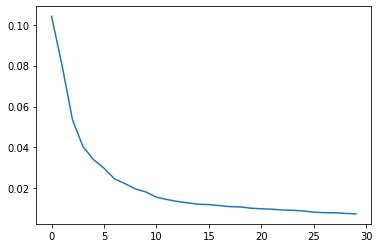

In [26]:
plt.plot(pca.explained_variance_ratio_)

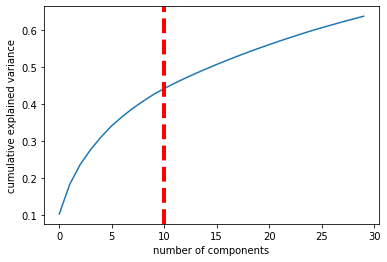

None

In [29]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

#### Random Forest

Lets consider a number of parameters to tune
- number of forests
- max features to split on each node
- max depth of the tree
- boostrap
- min samples split: minimum number of data points before node is split
- min sample leaf: minimum number of data points allowed in a leaf node

In [4]:
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 2000, num = 15)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [5]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf = RandomForestRegressor()
rf_randomsearch=RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100)
model_rf=rf_randomsearch.fit(train_data[feature_names],train_data['target'])

/usr/local/Cellar/python@3.7/3.7.9/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
print('best model: {}'.format(model_rf.best_estimator_))
print('best score: {}'.format(model_rf.best_score_))
print('best model_params: {}'.format(model_rf.best_params_))

In [ ]:
rf_model_best=model_rf.best_estimator_
#rf_model_best.fit(train_data[feature_names],train_data['target'])
#predictions=rf_model_best.predict(test_data[feature_names])

In [ ]:
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)

#### gradient boosting

In [ ]:
loss=['ls', 'lad', 'huber', 'quantile']
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 2000, num = 15)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
learning_rate = [0.1,0.01,0.001]


random_grid = {'loss': loss,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate':learning_rate}

In [ ]:
gb = GradientBoostingRegressor()
gb_randomsearch=RandomizedSearchCV(estimator=gb, param_distributions=random_grid, n_iter=100)
gb_model=gb_randomsearch.fit(train_data[feature_names],train_data['target'])

In [ ]:
print('best model: {}'.format(model_rf.best_estimator_))
print('best score: {}'.format(model_rf.best_score_))
print('best model_params: {}'.format(model_rf.best_params_))

In [ ]:
gb_model_best=model_rf.best_estimator_
#gb_model_best.fit(train_data[feature_names][:5],train_data['target'][:5])
#predictions=gb_model_best.predict(test_data[feature_names])

#### xgboost regressor

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 2000, num = 15)]
learning_rate=[0.0001, 0.001, 0.1]
min_child_weight=[0.1, 1, 5, 10, 50]
gamma=[0.5, 1, 1.5, 2, 5]
subsample=[0.6, 0.8, 1.0]
colsample_bytree=[0.6, 0.8, 1.0]
max_depth=[5, 10, 25, 50]
learning_rate=[0.0001, 0.001, 0.1]
n_estimators=[50, 100, 250, 500]
reg_alpha=[0.0001, 0.001, 0.1, 1]
reg_lambda=[0.0001, 0.001, 0.1, 1]

random_grid = {
    'min_child_weight':[0.1, 1, 5, 10, 50],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [5, 10, 25, 50],
    'learning_rate': [0.0001, 0.001, 0.1],
    'n_estimators': [50, 100, 250, 500],
    'reg_alpha': [0.0001, 0.001, 0.1, 1],
    'reg_lambda': [0.0001, 0.001, 0.1, 1]
    }

In [ ]:
xgb = XGBRegressor()
xgb_randomsearch=RandomizedSearchCV(estimator=xgb,param_distributions=random_grid,n_iter=100)
xgb_model=xgb_randomsearch.fit(train_data[feature_names],train_data['target'])

In [ ]:
print('best model: {}'.format(model_rf.best_estimator_))
print('best score: {}'.format(model_rf.best_score_)
print('best model_params: {}'.format(model_rf.best_params_)

In [ ]:
xgb_model_best=model_rf.best_estimator_
xgb_model_best.fit(train_data[feature_names][:5],train_data['target'][:5])
predictions=xgb_model_best.predict(test_data[feature_names])

#### lgbm regressor

In [ ]:
lgbm = LGBMBoostRegressor()

#### catboost regressor

In [ ]:
cb_model = CatBoostRegressor()

#### support vector Regressor

In [ ]:
kernel=['linear', 'poly', 'rbf', 'sigmoid']
degree=[2,3,4,5]
gamma=['scale', 'auto']
C=[1,2,3,4,5]
epsilon=[0.1,0.2,0.3,0.4,0.5]
shrinking=[True,False]

random_grid={'kernel':kernel,
             'degree':degree,
             'gamma':gamma,
             'C': C,
             'epsilon':epsilon,
             'shrinking':shrinking}

In [ ]:
svr = SVR()
svr_randomsearch=RandomizedSearchCV(estimator=svr,param_distributions=random_grid,n_iter=100)
model_svr=svr_randomsearch.fit(train_data[feature_names],train_data['target'])

In [ ]:
print('best model: {}'.format(model_svr.best_estimator_))
print('best score: {}'.format(model_svr.best_score_))
print('best model_params: {}'.format(model_svr.best_params_))

In [ ]:
svr_model_best=model_svr.best_estimator_
#svr_model_best.fit(train_data[feature_names][:5],train_data['target'][:5])
#predictions=svr_model_best.predict(test_data[feature_names])

#### Ensemble methods with random forest, gradient boosting and support vector regressor

In [ ]:
eclf1 = VotingRegressor(estimators=[('rf', rf_model_best), ('gb', gb_model_best), ('svr', svr_model_best)])
eclf1 = eclf1.fit(train_data[feature_names], train_data['target'])
predictions=eclf1.predict(test_data[feature_names])